In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv('C:/Users/vdzit/Desktop/adult.csv', sep=",")

In [35]:
X = df.drop('income', axis=1)  
y = df['income']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'education' ]
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [40]:
X = df.drop('income', axis=1)
y = df['income']

In [10]:
X = df.drop('PTS', axis=1)  
y = df['PTS']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Обучим модели
# Логистическая регрессия
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
models = [logistic_reg, svm, decision_tree]
model_names = ['Логистическая регрессия', 'SVM', 'Дерево решений']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Модель: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1}")
    print()

Модель: Логистическая регрессия
Accuracy: 0.8272085167366158
F1-score: 0.7210209162005305

Модель: SVM
Accuracy: 0.8554611526256526
F1-score: 0.7783918961818797

Модель: Дерево решений
Accuracy: 0.7655850138192241
F1-score: 0.43361549165120594



C:\Users\vdzit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


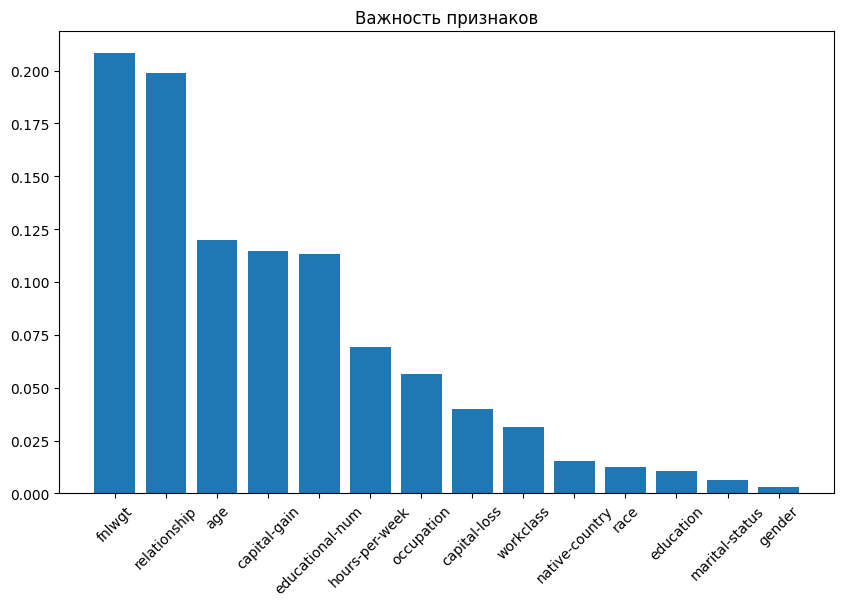

In [48]:
plt.figure(figsize=(10, 6))
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)  # Используем названия столбцов из DataFrame
plt.title('Важность признаков')
plt.show()

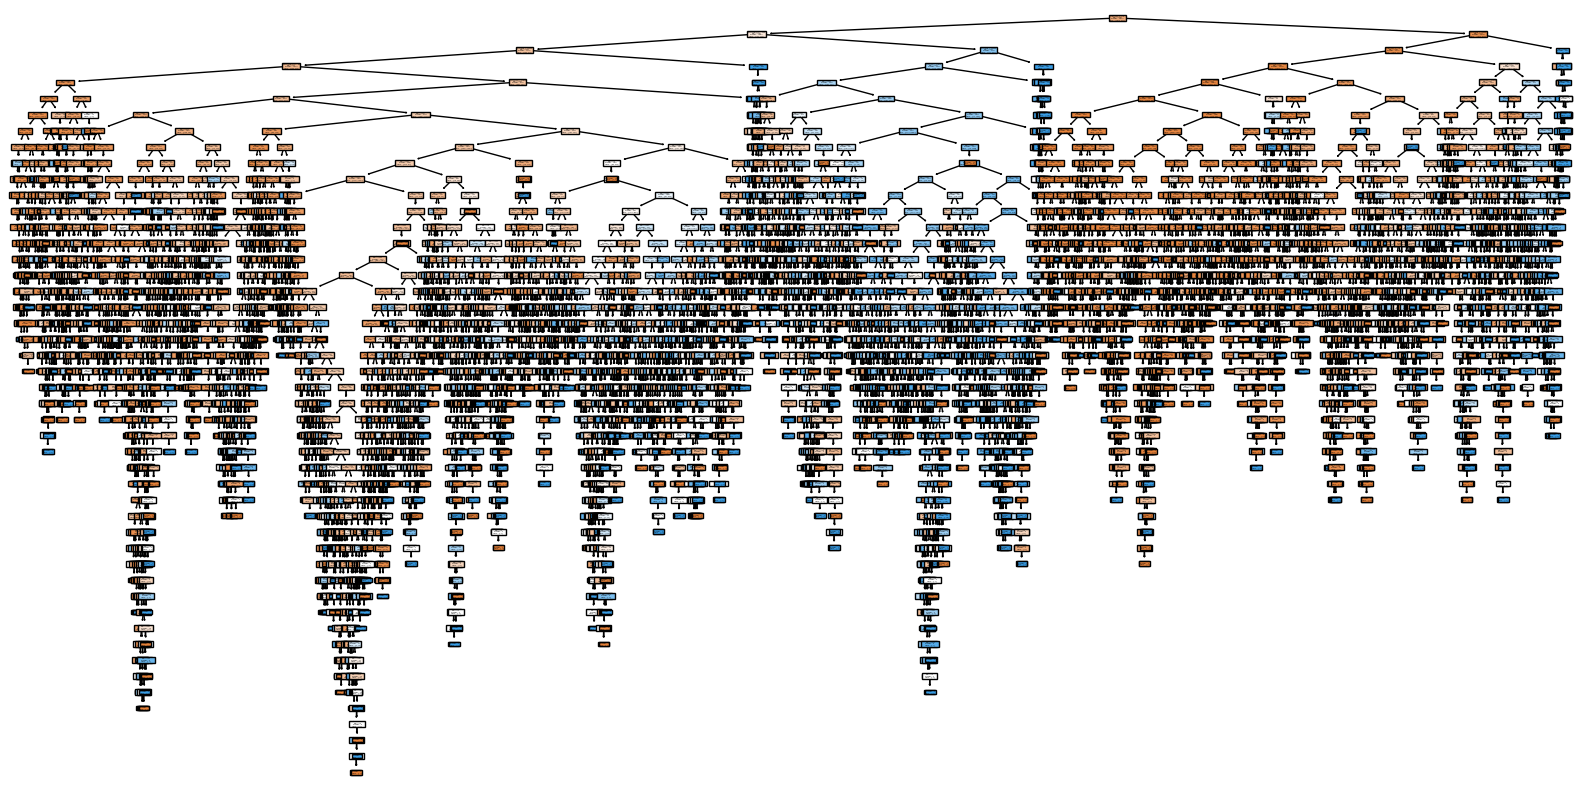

In [49]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, filled=True)
plt.show()
